In [1]:
import pandas as pd
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
from scipy.stats import linregress

from pathlib import Path

### Insulin Price Changes 2009 - 2023

In [2]:
FRED_PPIC_Diabetes_path = Path("Datasets/FRED_PPIC_Diabetes.csv")
FRED_PPIC_Diabetes_data = pd.read_csv(FRED_PPIC_Diabetes_path)

In [3]:
FRED_PPIC_Diabetes_data

,DATE,WPU06380103
0,2009-12-01,100.000
1,2010-01-01,99.800
2,2010-02-01,102.400
3,2010-03-01,103.000
4,2010-04-01,103.000
...,...,...
158,2023-02-01,315.576
159,2023-03-01,315.579
160,2023-04-01,315.579
161,2023-05-01,315.598


In [4]:
#just fyi
data_count = len(FRED_PPIC_Diabetes_data)
data_count

163

In [5]:
#converting to date/time in order to convert to year in next cell
FRED_PPIC_Diabetes_data["DATE"] = pd.to_datetime(FRED_PPIC_Diabetes_data["DATE"])
FRED_PPIC_Diabetes_data.info()
FRED_PPIC_Diabetes_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         163 non-null    datetime64[ns]
 1   WPU06380103  163 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


,DATE,WPU06380103
0,2009-12-01,100.000
1,2010-01-01,99.800
2,2010-02-01,102.400
3,2010-03-01,103.000
4,2010-04-01,103.000
...,...,...
158,2023-02-01,315.576
159,2023-03-01,315.579
160,2023-04-01,315.579
161,2023-05-01,315.598


In [6]:
#changing the dates into just the year so we can make computations later
FRED_PPIC_Diabetes_data["DATE"] = FRED_PPIC_Diabetes_data["DATE"].dt.year
FRED_PPIC_Diabetes_data

,DATE,WPU06380103
0,2009,100.000
1,2010,99.800
2,2010,102.400
3,2010,103.000
4,2010,103.000
...,...,...
158,2023,315.576
159,2023,315.579
160,2023,315.579
161,2023,315.598


In [7]:
#grouping by year 
year_group = FRED_PPIC_Diabetes_data.groupby("DATE")
year_group.groups

{2009: [0], 2010: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 2011: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 2012: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 2013: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48], 2014: [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 2015: [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], 2016: [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], 2017: [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], 2018: [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108], 2019: [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], 2020: [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132], 2021: [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144], 2022: [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156], 2023: [157, 158, 159, 160, 161, 162]}

In [8]:
#getting summary statistics table (not necessary to need all but why not)
year_group_stats = year_group.agg({"WPU06380103": ["mean", "median", "var", "std", "sem"]})
year_group_stats

WPU06380103                                         
            mean    median        var       std       sem
DATE                                                     
2009  100.000000  100.0000        NaN       NaN       NaN
2010  105.083333  104.0500  10.717879  3.273817  0.945070
2011  117.208333  117.1000  15.689924  3.961051  1.143457
2012  131.700000  128.9500  14.470909  3.804065  1.098139
2013  151.150000  149.9000  28.204545  5.310795  1.533095
2014  181.416667  185.3000  97.068788  9.852349  2.844128
2015  212.875000  218.4000  93.152955  9.651578  2.786171
2016  236.841667  230.3000  65.357197  8.084380  2.333759
2017  254.191667  257.8500  34.506288  5.874205  1.695737
2018  270.050000  270.3000   0.204545  0.452267  0.130558
2019  279.650000  279.4000   0.204545  0.452267  0.130558
2020  289.350000  289.3500   0.613636  0.783349  0.226134
2021  298.961500  298.8020   0.083959  0.289757  0.083646
2022  307.375500  307.3755   0.234362  0.484110  0.139751
2023  315.584333  315.5790   0.000114  0.010671  0.004356

In [9]:
average_price_per_year = year_group["WPU06380103"].mean()
average_price_per_year

DATE
2009    100.000000
2010    105.083333
2011    117.208333
2012    131.700000
2013    151.150000
2014    181.416667
2015    212.875000
2016    236.841667
2017    254.191667
2018    270.050000
2019    279.650000
2020    289.350000
2021    298.961500
2022    307.375500
2023    315.584333
Name: WPU06380103, dtype: float64

<Axes: xlabel='Year', ylabel='Mean Price of Insulin/Antidiabetes Products'>

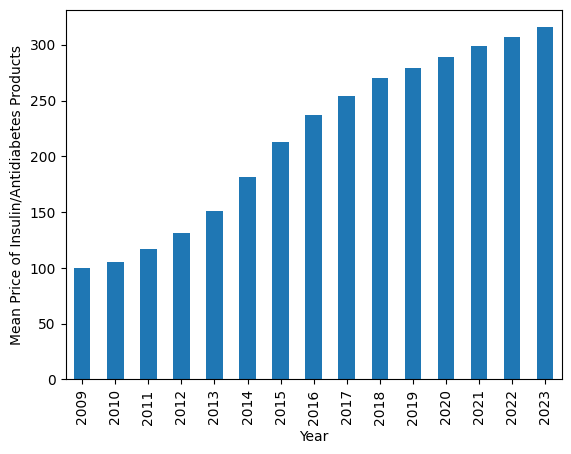

In [10]:
average_price_per_year.plot(kind="bar", xlabel = "Year", ylabel = "Mean Price of Insulin/Antidiabetes Products")

In [11]:
#bar_plot
#year_group_stats["DATE"] = pd.to_numeric(year_group_stats["DATE"])
# year_group_stats.plot(kind="scatter", x="DATE", y="mean")
# plt.show()

# years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
# plt.plot(years, year_group_stats["mean"], kind=scatter)

# average_price_per_year.plot(kind="scatter", x="DATE", y="mean")
# plt.show()

### GDP Per Capita

In [12]:
OWID_diabetes_vs_gdp_path = Path("Datasets/OWID_diabetes-prevalence-vs-gdp-per-capita.csv")
OWID_diabetes_vs_gdp_data = pd.read_csv(OWID_diabetes_vs_gdp_path)

In [13]:
OWID_diabetes_vs_gdp_data.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2011,7.6,1961.0963,29249156.0,NaN
2,Afghanistan,AFG,2021,10.9,1516.3057,40099460.0,NaN
3,Afghanistan,AFG,2002,NaN,1280.4631,21000258.0,NaN
4,Afghanistan,AFG,2003,NaN,1292.3335,22645136.0,NaN


In [14]:
usa = OWID_diabetes_vs_gdp_data.loc[OWID_diabetes_vs_gdp_data["Entity"] == "United States",:]
usa

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
54947,United States,USA,2011,9.4,54960.906,313876608.0,NaN
54948,United States,USA,2021,10.7,63669.710,336997632.0,NaN
54949,United States,USA,1990,NaN,40456.242,248083728.0,NaN
54950,United States,USA,1991,NaN,39876.016,251560192.0,NaN
54951,United States,USA,1992,NaN,40712.062,255175328.0,NaN
...,...,...,...,...,...,...,...
55201,United States,USA,1985,NaN,NaN,235146176.0,NaN
55202,United States,USA,1986,NaN,NaN,237512784.0,NaN
55203,United States,USA,1987,NaN,NaN,239853168.0,NaN
55204,United States,USA,1988,NaN,NaN,242287808.0,NaN


In [15]:
usa_year = usa_gdp.set_index(["Code"])["Year"]
usa_year

NameError: name 'usa_gdp' is not defined

In [ ]:
usa_gdp = usa_gdp.set_index(["Code"])["GDP per capita, PPP (constant 2017 international $)"]
usa_gdp

In [ ]:
usa_gdp_group = pd.DataFrame({"Year": usa_year,
                             "GDP per Capita":usa_gdp })
usa_gdp_group